In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

crimes = pd.read_csv('NYPD_Complaint_Data_Historic.csv',error_bad_lines=False)
print('Dataset Shape: ', crimes.shape)
crimes.head(3)

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Shape:  (6500870, 35)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,719713655,01/27/2009,03:00:00,01/27/2009,03:20:00,42.0,01/28/2009,578,HARRASSMENT 2,638.0,...,M,NaN,40.831389,-73.894818,"(40.831388554, -73.894817505)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,F
1,479761507,01/27/2009,01:00:00,01/28/2009,12:00:00,9.0,01/28/2009,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.725792,-73.979155,"(40.725792479, -73.979155299)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE,M
2,119195270,01/27/2009,00:30:00,01/27/2009,00:35:00,105.0,01/28/2009,105,ROBBERY,397.0,...,M,NaN,40.655265,-73.740193,"(40.655265027, -73.740193433)",PATROL BORO QUEENS SOUTH,NaN,18-24,BLACK,M


# Data

Crime rates in New York City spiked in the 1980s and early 1990s as the crack epidemic hit, but they have been dropping since 1991, and, as of 2017, they are among the lowest of major cities in the United States. During the 1990s, the New York City Police Department (NYPD) adopted CompStat, broken windows policing, and other strategies in a major effort to reduce crime. The city's dramatic drop in crime has been variously attributed to a number of factors, including the end of the crack epidemic, the legalization of abortion, and the decline of lead poisoning in children.

Today, the city is known more for its fashion and tourism than its criminal past. But, with rising wealth inequality, housing shortages, and a number of tourists flocking the city, there is still no scarcity of crime in the Big Apple.

This dataset provides nearly 40 years of crime reports from across all of NYC's neighborhoods. There is 6.5 million recorded complaints and 35 fields describing date, time, place of occurance crime and various other data including age, sex and race of suspects and victims. 

Detailed information about dataset can be downloaded [here](https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf).

In [2]:
#counting number of null values in each column
crimes.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1607101
CMPLNT_TO_TM         1602801
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18805
PD_CD                   5496
PD_DESC                 5496
CRM_ATPT_CPTD_CD           7
LAW_CAT_CD                 0
BORO_NM                10518
LOC_OF_OCCUR_DESC    1394809
PREM_TYP_DESC          37703
JURIS_DESC                 0
JURISDICTION_CODE       5496
PARKS_NM             6479911
HADEVELOPT           6177206
HOUSING_PSA          5998248
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4590963
SUSP_RACE            3222422
SUSP_SEX             3355736
TRANSIT_DISTRICT     6356760
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             5953
STATION_NAME         6356760
VIC_AGE_GROUP        1638441
VIC_RACE                 305
VIC_SEX       

In [3]:
crimes[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,6.483531e+06,6.483531e+06
mean,4.073480e+01,-7.392592e+01
std,8.675600e-02,7.857901e-02
min,4.011271e+01,-7.751921e+01
25%,4.067243e+01,-7.397323e+01
50%,4.073167e+01,-7.392733e+01
75%,4.081212e+01,-7.388328e+01
max,5.965727e+01,-7.368479e+01


### Data cleaning

In [4]:
#droping useless/sparse columns
crimes.drop(['CMPLNT_TO_DT', 'KY_CD', 'SUSP_AGE_GROUP','VIC_AGE_GROUP', 'CRM_ATPT_CPTD_CD', 'CMPLNT_TO_TM', 'RPT_DT', 'PD_CD', 'ADDR_PCT_CD', 'JURISDICTION_CODE', 'LOC_OF_OCCUR_DESC', 'HADEVELOPT', 'TRANSIT_DISTRICT','PARKS_NM', 'HOUSING_PSA', 'Lat_Lon', 'STATION_NAME'], inplace=True, axis=1)
crimes.head(3)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_RACE,VIC_SEX
0,719713655,01/27/2009,03:00:00,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,1013358.0,242189.0,BLACK,M,40.831389,-73.894818,PATROL BORO BRONX,UNKNOWN,F
1,479761507,01/27/2009,01:00:00,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,MANHATTAN,STREET,N.Y. POLICE DEPT,990028.0,203700.0,NaN,NaN,40.725792,-73.979155,PATROL BORO MAN SOUTH,WHITE,M
2,119195270,01/27/2009,00:30:00,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",FELONY,QUEENS,STREET,N.Y. POLICE DEPT,1056338.0,178111.0,BLACK,M,40.655265,-73.740193,PATROL BORO QUEENS SOUTH,BLACK,M


In [5]:
#removing null values
crimes = crimes[pd.notnull(crimes['Latitude'])]
crimes = crimes[pd.notnull(crimes['CMPLNT_FR_DT'])]
crimes = crimes[pd.notnull(crimes['CMPLNT_FR_TM'])]
crimes = crimes[pd.notnull(crimes['OFNS_DESC'])]
crimes = crimes[pd.notnull(crimes['BORO_NM'])]
crimes = crimes[pd.notnull(crimes['PREM_TYP_DESC'])]
crimes = crimes[pd.notnull(crimes['PATROL_BORO'])]

In [6]:
#defining bounding box for New York City
crimes = crimes[(crimes['Latitude'] < 40.9) & (crimes['Latitude'] > 40.5)]
crimes = crimes[(crimes['Longitude'] < -73.7) & (crimes['Longitude'] > -74.3)]

In [7]:
#Creating a DateTime column
crimes['TimeStamp'] = crimes.pop('CMPLNT_FR_DT') + ' ' + crimes.pop('CMPLNT_FR_TM')

In [8]:
crimes.TimeStamp = pd.to_datetime(crimes.TimeStamp, format='%m/%d/%Y %H:%M:%S', errors='coerce')

In [9]:
#Complaints before 2006 were badly recorded
crimes = crimes[(crimes['TimeStamp'].dt.year > 2006)]

In [10]:
crimes['OFNS_DESC'].value_counts().sort_values(ascending=True)

KIDNAPPING AND RELATED OFFENSES              2
UNDER THE INFLUENCE OF DRUGS                 3
OFFENSES AGAINST MARRIAGE UNCL               3
ABORTION                                     7
FORTUNE TELLING                              9
OTHER STATE LAWS (NON PENAL LAW)            10
OTHER TRAFFIC INFRACTION                    14
LOITERING/DEVIATE SEX                       14
ADMINISTRATIVE CODES                        17
LOITERING FOR DRUG PURPOSES                 19
LOITERING                                   22
KIDNAPPING                                  29
NYS LAWS-UNCLASSIFIED VIOLATION             44
DISRUPTION OF A RELIGIOUS SERV              46
INTOXICATED/IMPAIRED DRIVING                56
UNLAWFUL POSS. WEAP. ON SCHOOL              57
NEW YORK CITY HEALTH CODE                   79
ANTICIPATORY OFFENSES                       90
HOMICIDE-NEGLIGENT-VEHICLE                  94
HOMICIDE-NEGLIGENT,UNCLASSIFIE             124
ESCAPE 3                                   171
LOITERING/GAM

In [18]:
#Removing rare/undefined crimes
crimes = crimes[crimes['OFNS_DESC'] != 'OTHER STATE LAWS (NON PENAL LAW)']
crimes = crimes[crimes['OFNS_DESC'] != 'OFFENSES AGAINST MARRIAGE UNCL']
crimes = crimes[crimes['OFNS_DESC'] != 'LOITERING/DEVIATE SEX']
crimes = crimes[crimes['OFNS_DESC'] != 'FORTUNE TELLING']
crimes = crimes[crimes['OFNS_DESC'] != 'ABORTION']
crimes = crimes[crimes['OFNS_DESC'] != 'NYS LAWS-UNCLASSIFIED VIOLATION']
crimes = crimes[crimes['OFNS_DESC'] != 'NEW YORK CITY HEALTH CODE']
crimes = crimes[crimes['OFNS_DESC'] != 'OTHER STATE LAWS (NON PENAL LA']
crimes = crimes[crimes['OFNS_DESC'] != 'OTHER STATE LAWS']
crimes = crimes[crimes['OFNS_DESC'] != 'ADMINISTRATIVE CODE']
crimes = crimes[crimes['OFNS_DESC'] != 'NYS LAWS-UNCLASSIFIED FELONY']
crimes = crimes[crimes['OFNS_DESC'] != 'ESCAPE 3']
#crimes = crimes[crimes['SUSP_RACE'] != 'UNKNOWN']
#crimes = crimes[crimes['SUSP_SEX'] != 'U']

In [19]:
#cleaning up crime descriptions
crimes['OFNS_DESC'].replace('KIDNAPPING','KIDNAPPING & RELATED OFFENSES',inplace=True)
crimes['OFNS_DESC'].replace('KIDNAPPING AND RELATED OFFENSES','KIDNAPPING & RELATED OFFENSES',inplace=True)

crimes['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT-VEHICLE','HOMICIDE-NEGLIGENT',inplace=True)
crimes['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE','HOMICIDE-NEGLIGENT',inplace=True)

crimes['OFNS_DESC'].replace('LOITERING/GAMBLING (CARDS, DIC','LOITERING',inplace=True)
crimes['OFNS_DESC'].replace('LOITERING','LOITERING',inplace=True)

crimes['OFNS_DESC'].replace('OTHER OFFENSES RELATED TO THEF','THEFT-FRAUD',inplace=True)
crimes['OFNS_DESC'].replace('OFFENSES INVOLVING FRAUD','THEFT-FRAUD',inplace=True)
crimes['OFNS_DESC'].replace('FRAUDS','THEFT-FRAUD',inplace=True)

crimes['OFNS_DESC'].replace('INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING',inplace=True)

crimes['OFNS_DESC'].replace('PETIT LARCENY OF MOTOR VEHICLE', 'LARCENY OF MOTOR VEHICLE',inplace=True)
crimes['OFNS_DESC'].replace('GRAND LARCENY OF MOTOR VEHICLE', 'LARCENY OF MOTOR VEHICLE',inplace=True)
crimes['OFNS_DESC'].replace("BURGLAR'S TOOLS", 'BURGLARY',inplace=True)
crimes['OFNS_DESC'].replace("FRAUDULENT ACCOSTING", 'MISCELLANEOUS PENAL LAW',inplace=True)
crimes['OFNS_DESC'].replace("OTHER TRAFFIC INFRACTION", 'VEHICLE AND TRAFFIC LAWS',inplace=True)
crimes['OFNS_DESC'].replace("THEFT OF SERVICES", 'PETIT LARCENY',inplace=True)
crimes['OFNS_DESC'].replace("ENDAN WELFARE INCOMP", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("OFFENSES AGAINST PUBLIC SAFETY", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("DISORDERLY CONDUCT", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("JOSTLING", 'OFFENSES AGAINST THE PERSON', inplace=True)
crimes['OFNS_DESC'].replace("OFFENSES AGAINST THE PERSON", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("DISORDERLY CONDUCT", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)
crimes['OFNS_DESC'].replace("UNDER THE INFLUENCE OF DRUGS", 'OFF. AGNST PUB ORD SENSBLTY &',inplace=True)

crimes['OFNS_DESC'].replace("LOITERING FOR DRUG PURPOSES", 'DANGEROUS DRUGS',inplace=True)

#cleaning up place descriptions

crimes['PREM_TYP_DESC'].replace('RESIDENCE - APT. HOUSE','RESIDENCE',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESIDENCE - PUBLIC HOUSING','RESIDENCE',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESIDENCE-HOUSE','RESIDENCE',inplace=True)

crimes['PREM_TYP_DESC'].replace('CANDY STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('CHAIN STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('DEPARTMENT STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('DRUG STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESIDENCE-HOUSE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('LIQUOR STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('STORE UNCLASSIFIED','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('TELECOMM. STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('VARIETY STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('VIDEO STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('SMALL MERCHANT','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('SHOE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('FOOD SUPERMARKET','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('GROCERY/BODEGA','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('JEWELRY','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('BOOK/CARD','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('CANDY STORE','STORE',inplace=True)
crimes['PREM_TYP_DESC'].replace('CLOTHING/BOUTIQUE','STORE',inplace=True)

crimes['PREM_TYP_DESC'].replace('BAR/NIGHT CLUB','RESTAURANT/BAR',inplace=True)
crimes['PREM_TYP_DESC'].replace('RESTAURANT/DINER','RESTAURANT/BAR',inplace=True)
crimes['PREM_TYP_DESC'].replace('FAST FOOD','RESTAURANT/BAR',inplace=True)

crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PRIVATE)','PARKING_LOT',inplace=True)
crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PUBLIC)','PARKING_LOT',inplace=True)

crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PRIVATE)','SCHOOL',inplace=True)
crimes['PREM_TYP_DESC'].replace('PARKING LOT/GARAGE (PUBLIC)','SCHOOL',inplace=True)

crimes['PREM_TYP_DESC'].replace('TAXI (LIVERY LICENSED)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TAXI (YELLOW LICENSED)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TAXI/LIVERY (UNLICENSED)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TRAMWAY','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TRANSIT - NYC SUBWAY','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('TRANSIT FACILITY (OTHER)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('HIGHWAY/PARKWAY','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('BUS (NYC TRANSIT)','TRANSIT',inplace=True)
crimes['PREM_TYP_DESC'].replace('BUS (OTHER)','TRANSIT',inplace=True)

crimes['PREM_TYP_DESC'].replace('MOSQUE','RELIGIOUS',inplace=True)
crimes['PREM_TYP_DESC'].replace('CHURCH','RELIGIOUS',inplace=True)
crimes['PREM_TYP_DESC'].replace('SYNAGOGUE','RELIGIOUS',inplace=True)
crimes['PREM_TYP_DESC'].replace('OTHER HOUSE OF WORSHIP','RELIGIOUS',inplace=True)

crimes['PREM_TYP_DESC'].replace('ABANDONED BUILDING','OTHER',inplace=True)


In [20]:
crimes['OFNS_DESC'].value_counts().sort_values(ascending=True)

DISRUPTION OF A RELIGIOUS SERV              46
UNLAWFUL POSS. WEAP. ON SCHOOL              57
ANTICIPATORY OFFENSES                       90
HOMICIDE-NEGLIGENT                         218
LOITERING                                  226
CHILD ABANDONMENT/NON SUPPORT              374
AGRICULTURE & MRKTS LAW-UNCLASSIFIED       485
ALCOHOLIC BEVERAGE CONTROL LAW            1004
PROSTITUTION & RELATED OFFENSES           1055
OFFENSES RELATED TO CHILDREN              1573
KIDNAPPING & RELATED OFFENSES             2377
GAMBLING                                  2490
ARSON                                    14271
RAPE                                     15953
UNAUTHORIZED USE OF A VEHICLE            17520
POSSESSION OF STOLEN PROPERTY            31432
FORGERY                                  58754
SEX CRIMES                               66818
CRIMINAL TRESPASS                        69642
VEHICLE AND TRAFFIC LAWS                 72568
INTOXICATED/IMPAIRED DRIVING             82217
LARCENY OF MO

In [23]:
len(crimes['OFNS_DESC'].unique())

36

In [24]:
crimes.shape

(5863804, 17)

In [25]:
# selecting around 900 000 instances for exploration and prediction tasks
crimes = crimes.sample(frac=0.153, axis=0)
crimes.shape

(897162, 17)

### Feature engeneering

In [26]:
crimes['Date'] = crimes.TimeStamp.dt.date
crimes['Date'].sample(3)

2534638    2014-01-02
4998197    2007-12-01
2023716    2013-01-16
Name: Date, dtype: object

In [27]:
crimes['Year'] = crimes.TimeStamp.dt.year
crimes['Year'].sample(3)

661932     2011
4093038    2018
3764895    2017
Name: Year, dtype: int64

In [28]:
crimes['Month'] = crimes.TimeStamp.dt.month
crimes['Month'].sample(3)

5075681    10
4315761     1
1999564     2
Name: Month, dtype: int64

In [29]:
crimes['Day'] = crimes['TimeStamp'].dt.day
crimes['Day'].sample(3)

3836978    15
5650050    11
5529794     3
Name: Day, dtype: int64

In [30]:
crimes['Weekday'] = crimes['TimeStamp'].dt.weekday_name
crimes['Weekday'].sample(3)

1098070      Sunday
476129       Monday
808823     Thursday
Name: Weekday, dtype: object

In [31]:
days_to_int_dict = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6,
}
crimes['Weekday'] = crimes['Weekday'].map(days_to_int_dict)

In [32]:
crimes['Hour'] = crimes.TimeStamp.dt.hour
crimes['Hour'].sample(3)

6430746    16
6380922    20
5902167    13
Name: Hour, dtype: int64

In [33]:
crimes['Minute'] = crimes.TimeStamp.dt.minute
crimes['Minute'].sample(3)

3531089     0
420801      0
2395981    13
Name: Minute, dtype: int64

In [34]:
crimes['n_days'] = (crimes['Date'] - crimes['Date'].min()).apply(lambda x: x.days)
crimes['n_days'].sample(3)

477774     1147
3735279    3834
6202868     967
Name: n_days, dtype: int64

In [35]:
#saving data for analysis
crimes.to_csv('data_analyse.csv',index=False)
print('Done Outputing data_analyse.csv')

Done Outputing data_analyse.csv


## Preparing data for prediction

In [6]:
crimes.drop(['CMPLNT_NUM', 'X_COORD_CD', 'Y_COORD_CD', 'LAW_CAT_CD', 'PD_DESC', 'TimeStamp', 'PREM_TYP_DESC', 'Date','SUSP_RACE', 'SUSP_SEX', 'VIC_RACE', 'VIC_SEX', 'JURIS_DESC'], inplace=True, axis=1)

In [7]:
crimes.sample(3)

,OFNS_DESC,BORO_NM,Latitude,Longitude,PATROL_BORO,Year,Month,Day,Weekday,Hour,Minute,n_days
357368,DANGEROUS DRUGS,BROOKLYN,40.678512,-73.914931,PATROL BORO BKLYN NORTH,2007,3,4,6,19,55,62
832539,VEHICLE AND TRAFFIC LAWS,BRONX,40.818010,-73.913192,PATROL BORO BRONX,2015,3,2,0,16,40,2982
782767,FELONY ASSAULT,MANHATTAN,40.719840,-73.987545,PATROL BORO MAN SOUTH,2010,5,7,4,4,25,1222


In [8]:
crimes['OFNS_DESC'].value_counts()

PETIT LARCENY                           151059
HARRASSMENT 2                           111481
ASSAULT 3 & RELATED OFFENSES             95273
CRIMINAL MISCHIEF & RELATED OF           90517
GRAND LARCENY                            77012
DANGEROUS DRUGS                          56300
OFF. AGNST PUB ORD SENSBLTY &            50423
FELONY ASSAULT                           35003
ROBBERY                                  33033
BURGLARY                                 31658
MISCELLANEOUS PENAL LAW                  23159
DANGEROUS WEAPONS                        21392
THEFT-FRAUD                              19895
OFFENSES AGAINST PUBLIC ADMINI           17945
LARCENY OF MOTOR VEHICLE                 15734
INTOXICATED/IMPAIRED DRIVING             12492
VEHICLE AND TRAFFIC LAWS                 11091
CRIMINAL TRESPASS                        10774
SEX CRIMES                               10364
FORGERY                                   9091
POSSESSION OF STOLEN PROPERTY             4795
UNAUTHORIZED 

In [31]:
#crimes.to_csv('data_clean.csv',index=False)
#print('Done Outputing data_clean.csv')

Done Outputing data_clean.csv


In [9]:
categories = crimes['OFNS_DESC'].unique()
category_dict = {value:index for index,value in enumerate(categories)}
y = crimes['OFNS_DESC'].map(category_dict)

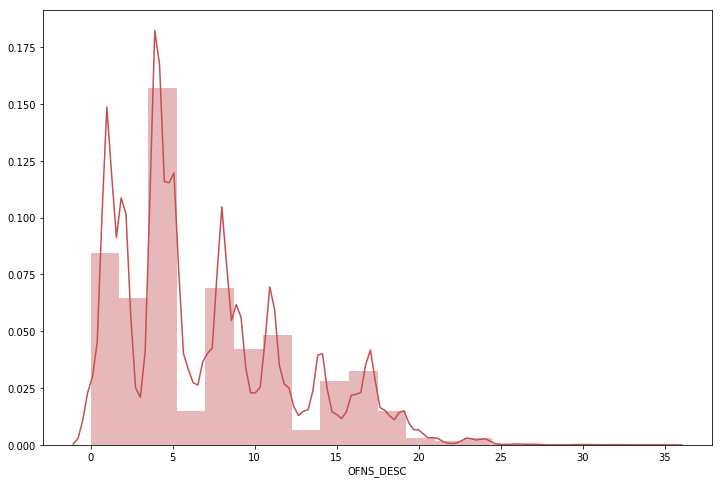

In [10]:
plt.figure(figsize=(12,8))
sns.set_color_codes()
sns.distplot(y,bins=20,color='r')

In [11]:
from sklearn import preprocessing

category = preprocessing.LabelEncoder()
category_crime = category.fit_transform(crimes.OFNS_DESC)
print(category_crime)

[10 16  7 ... 23  8 26]


In [14]:
category.inverse_transform(category_crime)

array(['DANGEROUS WEAPONS', 'HARRASSMENT 2',
       'CRIMINAL MISCHIEF & RELATED OF', ...,
       'OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS',
       'PETIT LARCENY'], dtype=object)

In [19]:
integer_mapping = {l: i for i, l in enumerate(category.classes_)}
integer_mapping

{'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 0,
 'ALCOHOLIC BEVERAGE CONTROL LAW': 1,
 'ANTICIPATORY OFFENSES': 2,
 'ARSON': 3,
 'ASSAULT 3 & RELATED OFFENSES': 4,
 'BURGLARY': 5,
 'CHILD ABANDONMENT/NON SUPPORT': 6,
 'CRIMINAL MISCHIEF & RELATED OF': 7,
 'CRIMINAL TRESPASS': 8,
 'DANGEROUS DRUGS': 9,
 'DANGEROUS WEAPONS': 10,
 'DISRUPTION OF A RELIGIOUS SERV': 11,
 'FELONY ASSAULT': 12,
 'FORGERY': 13,
 'GAMBLING': 14,
 'GRAND LARCENY': 15,
 'HARRASSMENT 2': 16,
 'HOMICIDE-NEGLIGENT': 17,
 'INTOXICATED/IMPAIRED DRIVING': 18,
 'KIDNAPPING & RELATED OFFENSES': 19,
 'LARCENY OF MOTOR VEHICLE': 20,
 'LOITERING': 21,
 'MISCELLANEOUS PENAL LAW': 22,
 'OFF. AGNST PUB ORD SENSBLTY &': 23,
 'OFFENSES AGAINST PUBLIC ADMINI': 24,
 'OFFENSES RELATED TO CHILDREN': 25,
 'PETIT LARCENY': 26,
 'POSSESSION OF STOLEN PROPERTY': 27,
 'PROSTITUTION & RELATED OFFENSES': 28,
 'RAPE': 29,
 'ROBBERY': 30,
 'SEX CRIMES': 31,
 'THEFT-FRAUD': 32,
 'UNAUTHORIZED USE OF A VEHICLE': 33,
 'UNLAWFUL POSS. WEAP. ON SCHOO

In [44]:
#feature normalization
def normalize(data): 
    data = (data - data.min()) / (data.max() - data.min())
    return data

crimes['n_days'] = normalize(crimes.n_days)

In [45]:
def prepare_data(df):
    """
    Preprocessing Training/Testing Data 
    """
    feature_list=df.columns.tolist()  
    cleanData=df[feature_list]
    cleanData.index=range(len(df))
    
    print("Creating sin-cos Lat/Lon feature...")
    cleanData['LL_X'] = np.cos(cleanData['Latitude']) * np.cos(cleanData['Longitude'])
    cleanData['LL_Y'] = np.cos(cleanData['Latitude']) * np.sin(cleanData['Longitude'])
    cleanData['LL_Z'] = np.sin(cleanData['Latitude'])
    '''ll_scaler = preprocessing.StandardScaler()
    ll_scaler.fit(cleanData[["XLL","YLL", "ZLL"]])
    cleanData[["XLL","YLL", "ZLL"]] = ll_scaler.transform(cleanData[["XLL","YLL", "ZLL"]])'''
    
    print("Creating ordinal representations of circular features (Month/Year/Weekday/Minute)")
    cleanData['Hour_X'] = np.sin(2*np.pi*cleanData['Hour']/23)
    cleanData['Hour_Y'] = np.cos(2*np.pi*cleanData['Hour']/23)
    cleanData['Month_X'] = np.sin(2*np.pi*cleanData['Month']/11)
    cleanData['Month_Y'] = np.cos(2*np.pi*cleanData['Month']/11)
    cleanData['Weekday_X'] = np.sin(2*np.pi*cleanData['Weekday']/6)
    cleanData['Weekday_Y'] = np.cos(2*np.pi*cleanData['Weekday']/6)
    cleanData['Minute_X'] = np.sin(2*np.pi*cleanData['Weekday']/59)
    cleanData['Minute_Y'] = np.cos(2*np.pi*cleanData['Weekday']/59) 
    cleanData['Year'] = normalize(cleanData.Year)

    category = preprocessing.LabelEncoder()
    category_boro = category.fit_transform(cleanData.BORO_NM)
    
    cleanData['BORO_NM'] = category_boro
    
    print ("Droping processed columns...")
    cleanData=cleanData.drop(["Minute", "Latitude", "Longitude","PATROL_BORO", "OFNS_DESC", "Hour","Day","Month","Weekday"],\
                                axis=1,inplace=False)
    
    print('Done!')
    
    return cleanData

In [46]:
features = prepare_data(crimes)
features['crime'] = category_crime

Creating sin-cos Lat/Lon feature...
Creating ordinal representations of circular features (Month/Year/Weekday/Minute)
Droping processed columns...
Done!


In [47]:
collist=features.columns.tolist()
collist

['BORO_NM',
 'Year',
 'n_days',
 'LL_X',
 'LL_Y',
 'LL_Z',
 'Hour_X',
 'Hour_Y',
 'Month_X',
 'Month_Y',
 'Weekday_X',
 'Weekday_Y',
 'Minute_X',
 'Minute_Y',
 'crime']

In [48]:
features.head()

,BORO_NM,Year,n_days,LL_X,LL_Y,LL_Z,Hour_X,Hour_Y,Month_X,Month_Y,Weekday_X,Weekday_Y,Minute_X,Minute_Y,crime
0,2,1.000000,0.997946,-0.114243,-0.992967,0.031071,-0.269797,0.962917,0.540641,0.841254,-8.660254e-01,0.5,0.507666,0.861554,10
1,3,0.181818,0.180968,-0.017943,-0.993626,0.111291,-0.631088,-0.775711,0.989821,-0.142315,8.660254e-01,-0.5,0.211383,0.977403,16
2,0,0.454545,0.460749,-0.013314,-0.998910,-0.044733,0.942261,-0.334880,-0.755750,-0.654861,1.224647e-16,-1.0,0.314077,0.949398,7
3,2,0.454545,0.483113,-0.116816,-0.992079,0.046187,-0.997669,-0.068242,-0.540641,0.841254,1.224647e-16,-1.0,0.314077,0.949398,8
4,4,0.000000,0.007987,-0.388155,-0.863137,0.323002,-0.979084,0.203456,0.909632,0.415415,0.000000e+00,1.0,0.000000,1.000000,26


In [49]:
features.to_csv('data_features.csv',index=False)
print('Done Outputing data_clean.csv')

Done Outputing data_clean.csv
